**Introduction**

This project explores the relationship between digital habits (screen time, social media usage, TikTok hours, etc) and mental health indicators (stress level and mood score).
The goal is to:


*   Clean and preprocess the dataset
*   Perform exploratory data analysis (EDA)
*   Visualize correlations
*   Build a model to predict mental-health outcomes
*   Present insights from the data

In [ ]:
# Libraries I will be Using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Loading DataSet

df = pd.read_csv('digital_habits_vs_mental_health.csv')
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


In [ ]:
#Inspecting The Data
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (100000, 6)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB
None

Missing Values:
screen_time_hours              0
social_media_platforms_used    0
hours_on_TikTok                0
sleep_hours                    0
stress_level                   0
mood_score                     0
dtype: int64


In [ ]:
# Count duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("New shape after duplicates are removed:", df.shape)

Number of duplicate rows: 1865
New shape after duplicates are removed: (98135, 6)


In [ ]:
df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,98135.000000,98135.000000,98135.000000,98135.000000,98135.000000,98135.000000
mean,6.017178,2.998268,2.407408,6.978098,6.196698,9.048607
std,1.991190,1.414731,1.081405,1.469633,2.048782,1.283805
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.000000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.000000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.000000
75%,7.400000,4.000000,3.100000,8.000000,8.000000,10.000000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.000000


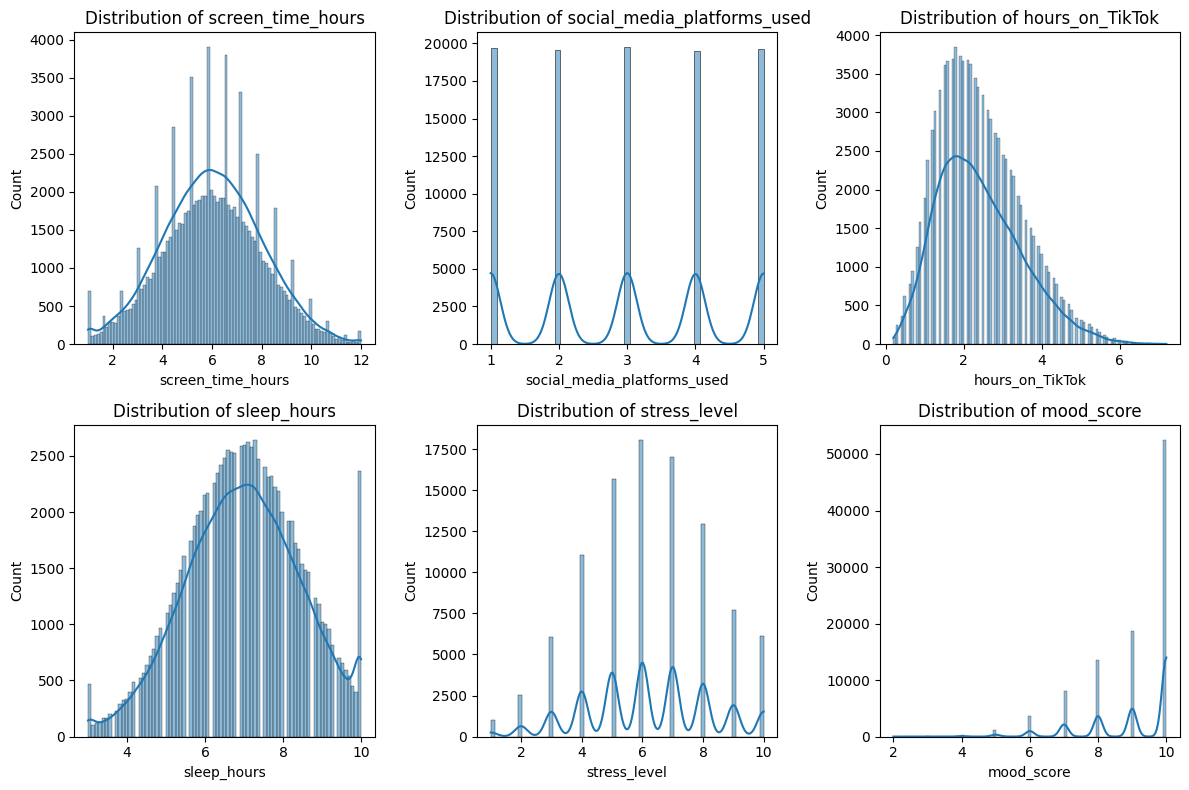

In [ ]:
#Visualizing distributions for each variable

numerical_cols = df.columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

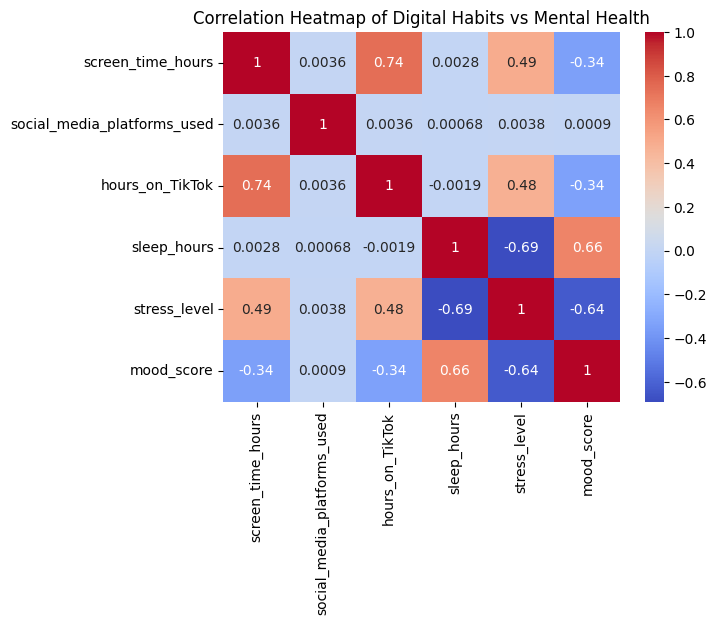

In [ ]:
#Correlation HeatMapplt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Digital Habits vs Mental Health")
plt.show()

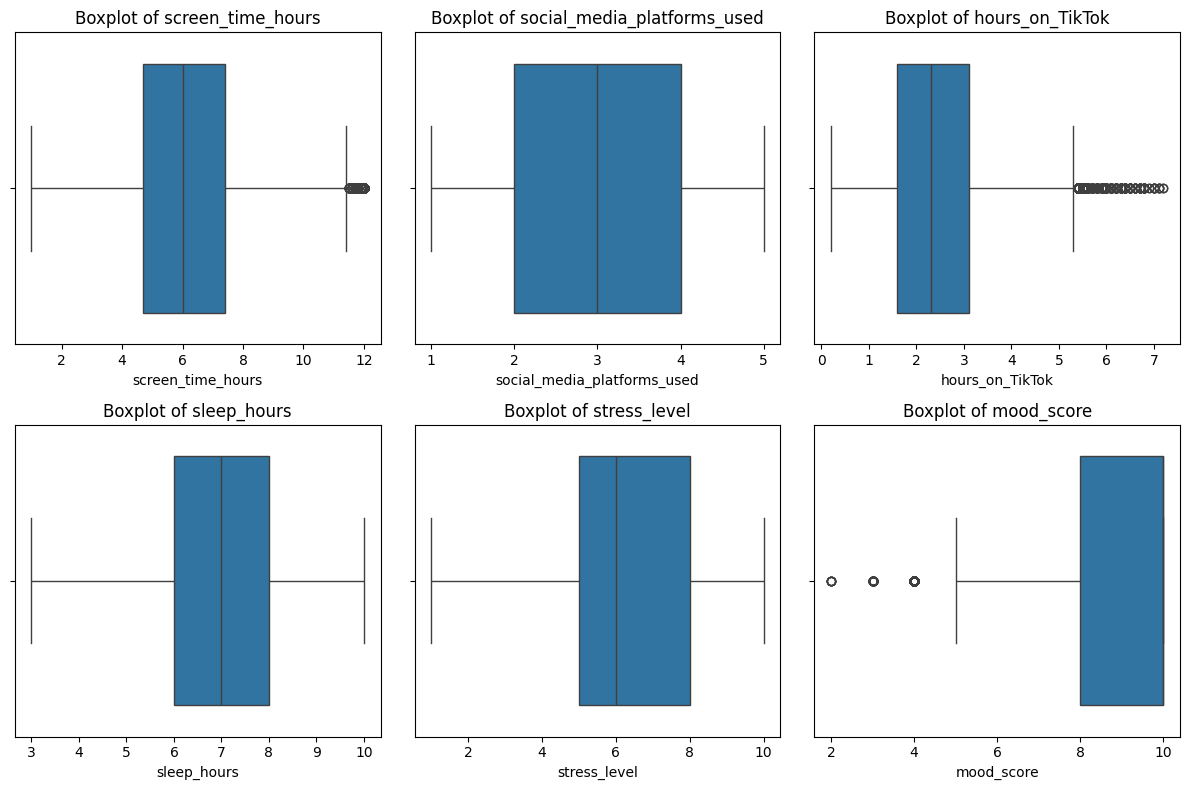

In [ ]:
#Creating BoxPlot to check for outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Target variable
y = df['stress_level']

# Everything except target
X = df.drop('stress_level', axis=1)

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 2.15089613e+00, -7.05627172e-01,  2.67486049e+00,
        -1.75425526e+00, -3.15361459e+00],
       [ 2.42480134e-01,  1.41492780e+00,  1.01035020e+00,
        -5.29453078e-01, -8.16799751e-01],
       [ 1.54823845e+00,  7.08076141e-01,  3.63040641e-01,
        -2.57274815e-01, -8.16799751e-01],
       [ 2.42480134e-01,  1.22448445e-03,  8.56222594e-02,
        -3.25319381e-01, -3.78614724e-02],
       [-1.96726470e+00,  1.22448445e-03, -1.11652406e+00,
         5.59259974e-01,  7.41076807e-01]])

In [ ]:
#Splitting into testing and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
df['tiktok_intensity'] = df['hours_on_TikTok'] / df['screen_time_hours']
df['platform_intensity'] = df['social_media_platforms_used'] / df['screen_time_hours']
df['sleep_efficiency'] = df['sleep_hours'] / df['screen_time_hours']
df[['tiktok_intensity', 'platform_intensity', 'sleep_efficiency']].head()


,tiktok_intensity,platform_intensity,sleep_efficiency
0,0.514563,0.194175,0.427184
1,0.538462,0.769231,0.953846
2,0.307692,0.439560,0.725275
3,0.384615,0.461538,1.000000
4,0.571429,1.428571,3.714286


In [ ]:
# Defining new X
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Scale again
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split again
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=4,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Decision Tree Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)

Decision Tree Performance:
R² Score: 0.7089051920600251
RMSE: 1.1076176004437095


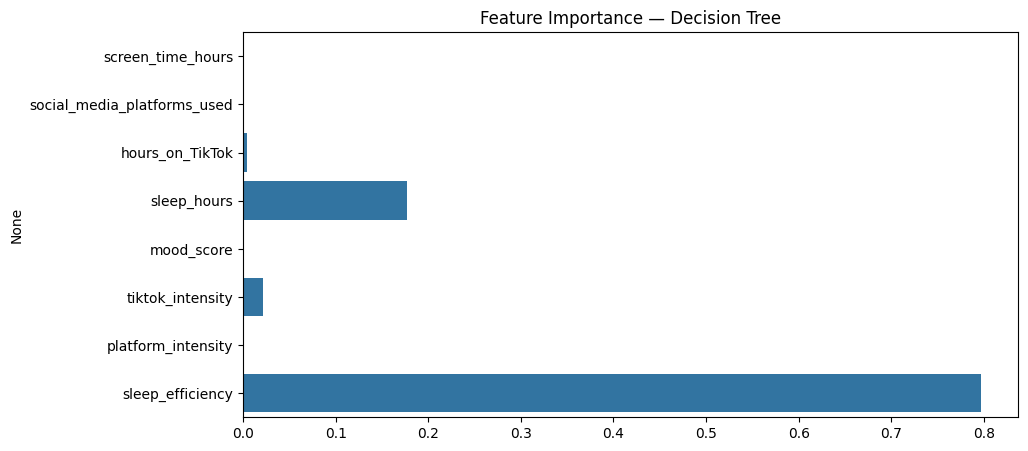

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance — Decision Tree")
plt.show()
